In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import scipy
import time
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [5]:
# def linearODE(t, y, alpha):
#     yp = np.ones_like(y)
#     yp[0] = -alpha*y + np.exp(-t)
#     return yp

# OAH
# def linearODE(t, y, alpha):
#     yp = np.ones_like(y)
#     yp[0] = y[1]
#     yp[1] = -2*alpha*y[1] - y[0]
#     return yp

# VDP linear
def linearODE(t, y, alpha):
    yp = np.ones_like(y)
    yp[0] = y[1]
    yp[1] = alpha*y[1] - y[0]
    return yp
y0 = [2., 0.]

# exemple 1
# def linearODE(t, y, alpha):
#     yp = np.ones_like(y)
#     yp[0] = -2*y[0] + y[1] + 2*np.sin(t)
#     yp[1] = (alpha-1)*y[0] - alpha*y[1] + alpha*(np.cos(t) - np.sin(t))
#     return yp

 67%|██████▋   | 6/9 [00:00<00:00,  9.72it/s]d:\Logiciel\Anaconda\envs\pinns\lib\site-packages\scipy\integrate\_ivp\radau.py:108: RuntimeWarning: overflow encountered in multiply
  f_real = F.T.dot(TI_REAL) - M_real * W[0]
d:\Logiciel\Anaconda\envs\pinns\lib\site-packages\scipy\integrate\_ivp\radau.py:108: RuntimeWarning: invalid value encountered in subtract
  f_real = F.T.dot(TI_REAL) - M_real * W[0]
 89%|████████▉ | 8/9 [00:03<00:00,  2.59it/s]


ValueError: array must not contain infs or NaNs

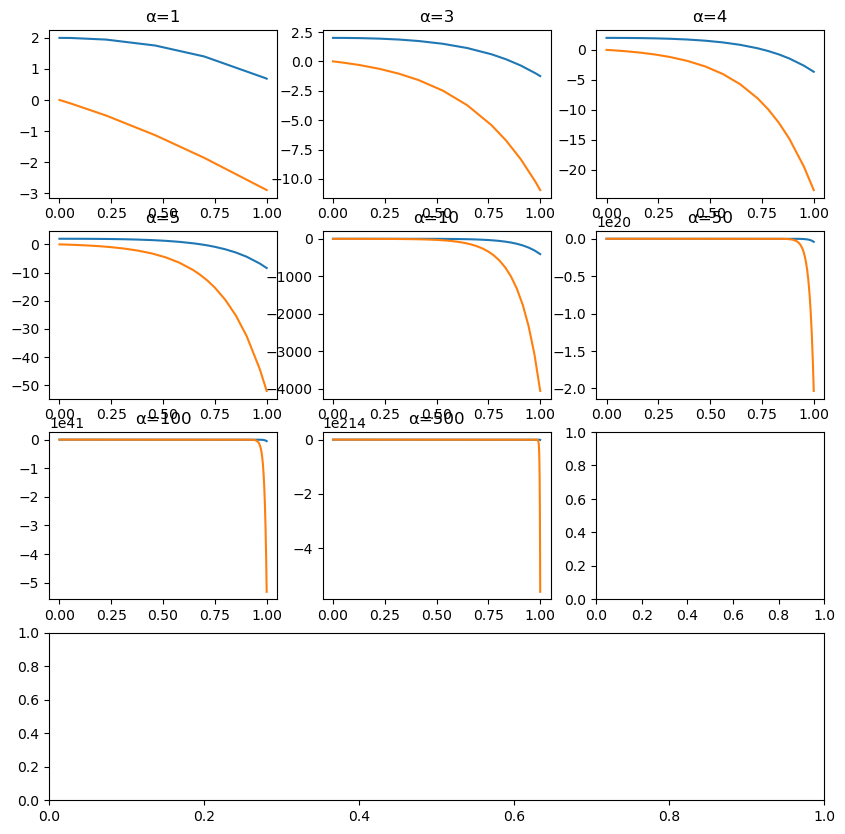

In [6]:
import matplotlib.gridspec as gridspec
alpha_list =  [1, 3, 4, 5, 10, 50, 100, 500, 1000]
fig, ax = plt.subplots(4, 3, figsize=(10, 10))
gs = gridspec.GridSpec(4, 3, width_ratios=[1, 1, 3])
ax_all = plt.subplot(gs[3, :])

computational_time = []
nb_step = []
for i, alpha in tqdm(enumerate(alpha_list), total=len(alpha_list)):
    
    equation = scipy.integrate.Radau(lambda t, y: linearODE(t, y, alpha=alpha),
                                 t0 = 0,
                                 y0 = y0,
                                 t_bound = 1,
                                 rtol=0.0001,
                                 atol=1e-07
                                 )
    
    t_final = []
    y1_final = []
    y2_final = []
    start = time.time()
    while(True):
        t_final.append(equation.t)
        y1_final.append(equation.y[0])
        y2_final.append(equation.y[1])
        if equation.status == 'finished':
            break
        if equation.status == 'failed':
            break
        equation.step()
    end = time.time()
    computational_time.append(end-start)
    nb_step.append(len(t_final))

    ax[i//3, i%3].plot(t_final, y1_final)
    ax[i//3, i%3].plot(t_final, y2_final)
    ax[i//3, i%3].set_title(f"α={alpha}")

ax_all.plot(alpha_list, computational_time, 'g-o')
ax_all.set_xlabel("μ")
ax_all.set_ylabel("time (sec)", color = "g")
ax_all.set_title("Computational time and number of step for the solution")

secax_y = ax_all.twinx()
secax_y.plot(alpha_list, nb_step, 'r-o', alpha=0.5)
secax_y.set_xlabel("μ")
secax_y.set_ylabel("Step", color = "r")

fig.suptitle(f"Solution of damped harmonic oscillator using Radeau", size=20)
fig.tight_layout()
fig.subplots_adjust(top=0.88)

 22%|██▏       | 2/9 [00:00<00:02,  2.77it/s]C:\Users\Emilien\AppData\Local\Temp\ipykernel_2528\3601631255.py:17: RuntimeWarning: invalid value encountered in double_scalars
  yp[1] = alpha*y[1] - y[0]
100%|██████████| 9/9 [00:01<00:00,  4.75it/s]


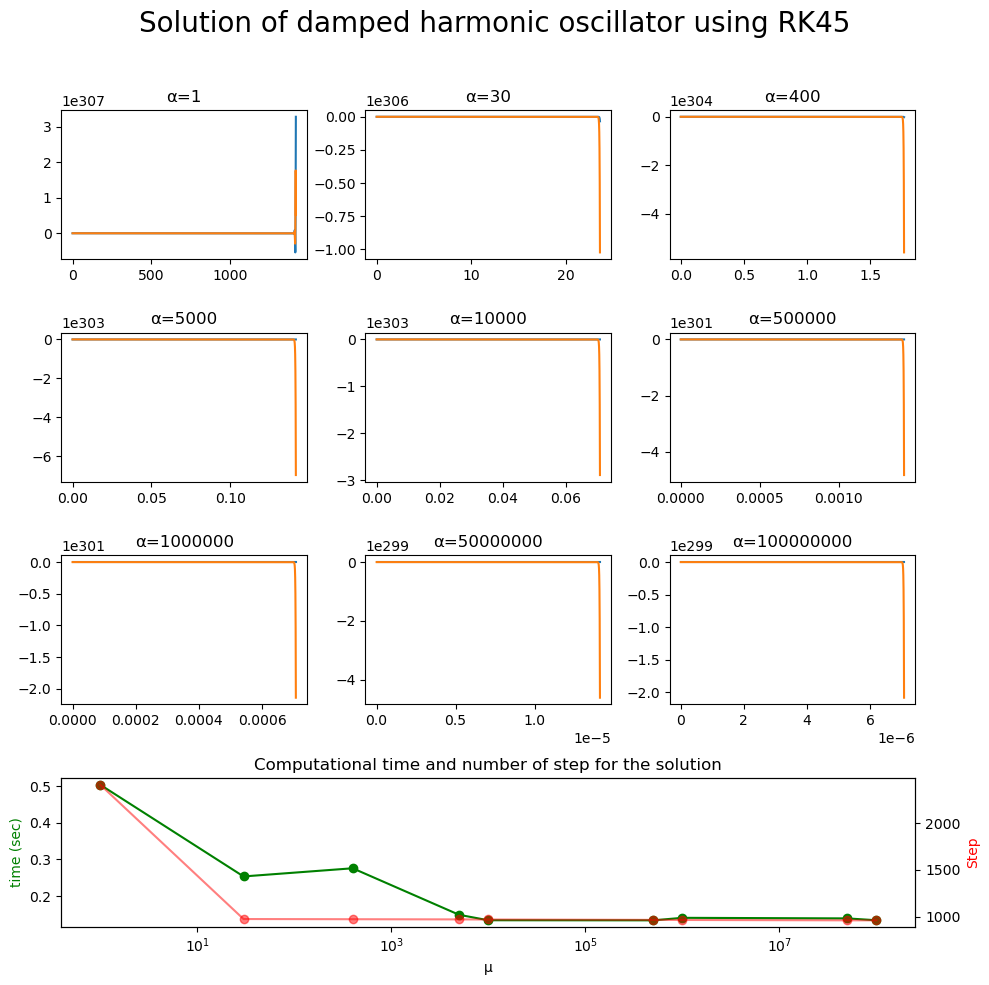

In [7]:
import matplotlib.gridspec as gridspec
alpha_list =  [1, 30, 400, 5000, 10000, 500000, 1000000, 50000000, 100000000]
fig, ax = plt.subplots(4, 3, figsize=(10, 10))
gs = gridspec.GridSpec(4, 3, width_ratios=[1, 1, 3])
ax_all = plt.subplot(gs[3, :])

computational_time = []
nb_step = []
for i, alpha in tqdm(enumerate(alpha_list), total=len(alpha_list)):
    
    equation = scipy.integrate.RK45(lambda t, y: linearODE(t, y, alpha=alpha),
                                 t0 = 0,
                                 y0 = y0,
                                 t_bound = 1000000.,
                                 rtol=0.0001,
                                 atol=1e-07
                                 )
    
    t_final = []
    y1_final = []
    y2_final = []
    start = time.time()
    while(True):
        t_final.append(equation.t)
        y1_final.append(equation.y[0])
        y2_final.append(equation.y[1])
        if equation.status == 'finished':
            break
        if equation.status == 'failed':
            break
        equation.step()
    end = time.time()
    computational_time.append(end-start)
    nb_step.append(len(t_final))

    ax[i//3, i%3].plot(t_final, y1_final)
    ax[i//3, i%3].plot(t_final, y2_final)
    ax[i//3, i%3].set_title(f"α={alpha}")

ax_all.plot(alpha_list, computational_time, 'g-o')
ax_all.set_xlabel("μ")
ax_all.set_ylabel("time (sec)", color = "g")
ax_all.set_title("Computational time and number of step for the solution")

secax_y = ax_all.twinx()
secax_y.plot(alpha_list, nb_step, 'r-o', alpha=0.5)
secax_y.set_xlabel("μ")
secax_y.set_xscale("log")
secax_y.set_ylabel("Step", color = "r")

fig.suptitle(f"Solution of damped harmonic oscillator using RK45", size=20)
fig.tight_layout()
fig.subplots_adjust(top=0.88)

In [43]:
equation = scipy.integrate.RK45(lambda t, y: linearODE(t, y, alpha=200),
                                t0 = 0,
                                y0 = [1, 0.5],
                                t_bound = 100,
                                rtol=0.0001,
                                atol=1e-07
                                )

t_final = []
y1_final = []
y2_final = []
while(True):
    t_final.append(equation.t)
    y1_final.append(equation.y[0])
    y2_final.append(equation.y[1])
    if equation.status == 'finished':
        break
    if equation.status == 'failed':
        break
    equation.step()

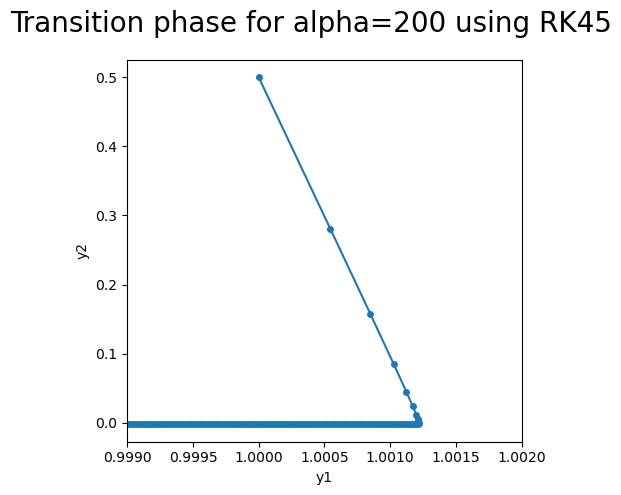

In [51]:
fig, ax = plt.subplots(1, figsize=(5, 5))
ax.plot(y1_final, y2_final, "-o", markersize=4)

ax.set_xlabel("y1")
ax.set_ylabel("y2")
ax.set_xlim([0.999,1.002])

fig.suptitle(f"Transition phase for alpha={200} using RK45", size=20)
fig.tight_layout()
fig.subplots_adjust(top=0.88)

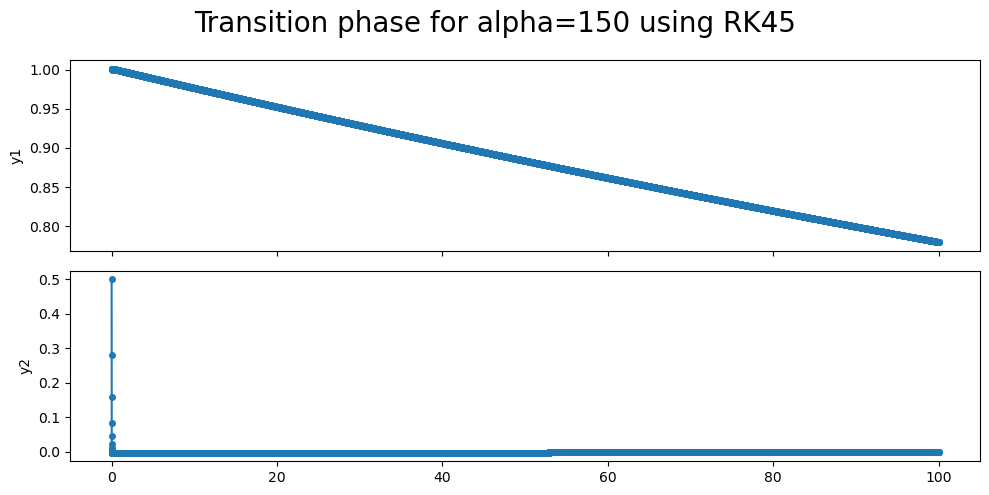

In [53]:
fig, ax = plt.subplots(2, figsize=(10, 5), sharex=True)
ax[0].plot(t_final, y1_final, "-o", markersize=4)
ax[1].plot(t_final, y2_final, "-o", markersize=4)

ax[0].set_ylabel("y1")
ax[1].set_ylabel("y2")

fig.suptitle(f"Transition phase for alpha={150} using RK45", size=20)
fig.tight_layout()
fig.subplots_adjust(top=0.88)